In [413]:
import pandas as pd

data_train = pd.read_excel("Data_Train (1).xlsx")
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [414]:
data_test = pd.read_excel("Data_Test (1).xlsx")
data_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


Cleaning Up Brand column after creation

In [415]:
data_train['Brand'] = data_train.Name.str.split().str.get(0)
data_train.loc[data_train['Brand'] == 'Land', 'Brand'] = 'Land Rover'
data_train.loc[data_train['Brand'] == 'ISUZU', 'Brand'] = 'Isuzu'
data_train.insert(0,'Brand', data_train.pop("Brand"))

data_test['Brand'] = data_test.Name.str.split().str.get(0)
data_test.loc[data_test['Brand'] == 'Land', 'Brand'] = 'Land Rover'
data_test.loc[data_test['Brand'] == 'ISUZU', 'Brand'] = 'Isuzu'
data_test.insert(0,'Brand', data_test.pop("Brand"))

In [416]:
data_train.loc[data_train['Brand'] != 'Land Rover', 'Model'] = data_train.Name.str.split().str.get(1)
data_train.loc[data_train['Brand'] == 'Land Rover', 'Model'] = data_train.Name.str.split().str.get(2)
data_train.insert(1,'Model', data_train.pop("Model"))

data_test.loc[data_test['Brand'] != 'Land Rover', 'Model'] = data_test.Name.str.split().str.get(1)
data_test.loc[data_test['Brand'] == 'Land Rover', 'Model'] = data_test.Name.str.split().str.get(2)
data_test.insert(1,'Model', data_test.pop("Model"))

In [417]:
data_train.drop(['Name'], axis=1, inplace = True)

data_test.drop(['Name'], axis=1, inplace = True)

In [418]:
data_train.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [419]:
data_test.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Alto,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti,Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota,Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota,Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai,i20,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [420]:
data_train['Fuel_Type'].value_counts(), data_test['Fuel_Type'].value_counts()

(Diesel      3205
 Petrol      2746
 CNG           56
 LPG           10
 Electric       2
 Name: Fuel_Type, dtype: int64,
 Diesel    647
 Petrol    579
 CNG         6
 LPG         2
 Name: Fuel_Type, dtype: int64)

In [421]:
data_train.isnull().sum(), data_test.isnull().sum()

(Brand                 0
 Model                 0
 Location              0
 Year                  0
 Kilometers_Driven     0
 Fuel_Type             0
 Transmission          0
 Owner_Type            0
 Mileage               2
 Engine               36
 Power                36
 Seats                42
 Price                 0
 dtype: int64,
 Brand                 0
 Model                 0
 Location              0
 Year                  0
 Kilometers_Driven     0
 Fuel_Type             0
 Transmission          0
 Owner_Type            0
 Mileage               0
 Engine               10
 Power                10
 Seats                11
 dtype: int64)

In [422]:
data_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [423]:
data_test.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [424]:
data_train['Mileage unit'] = data_train.Mileage.str.split().str.get(1)
data_train['Mileage'] = data_train.Mileage.str.split().str.get(0).astype(float)
data_train.rename(columns={'Mileage': 'Mileage value'}, inplace=True)
data_train.insert(9,'Mileage unit', data_train.pop("Mileage unit"))
data_train.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine,Power,Seats,Price
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,kmpl,1968 CC,140.8 bhp,5.0,17.74


In [425]:
data_test['Mileage unit'] = data_test.Mileage.str.split().str.get(1)
data_test['Mileage'] = data_test.Mileage.str.split().str.get(0).astype(float)
data_test.rename(columns={'Mileage': 'Mileage value'}, inplace=True)
data_test.insert(9,'Mileage unit', data_test.pop("Mileage unit"))
data_test.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine,Power,Seats
0,Maruti,Alto,Delhi,2014,40929,CNG,Manual,First,32.26,km/kg,998 CC,58.2 bhp,4.0
1,Maruti,Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,kmpl,796 CC,47.3 bhp,5.0
2,Toyota,Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68,kmpl,2393 CC,147.8 bhp,7.0
3,Toyota,Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59,kmpl,1364 CC,null bhp,5.0
4,Hyundai,i20,Mumbai,2014,29000,Petrol,Manual,First,18.50,kmpl,1197 CC,82.85 bhp,5.0


In [426]:
data_test['Mileage unit'].value_counts()

kmpl     1226
km/kg       8
Name: Mileage unit, dtype: int64

In [427]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              6019 non-null   object 
 1   Model              6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage value      6017 non-null   float64
 9   Mileage unit       6017 non-null   object 
 10  Engine             5983 non-null   object 
 11  Power              5983 non-null   object 
 12  Seats              5977 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 658.5+ KB


In [428]:
data_train.fillna("-1", axis=1, inplace=True)

In [429]:
data_test.fillna("-1", axis=1, inplace=True)

In [430]:
data_train['Engine'] = data_train['Engine'].str.split().str.get(0).astype(int)
data_train.rename(columns={'Engine': 'Engine (CC)'}, inplace=True)
data_train.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine (CC),Power,Seats,Price
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6,km/kg,998,58.16 bhp,5,1.75
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,kmpl,1582,126.2 bhp,5,12.50
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2,kmpl,1199,88.7 bhp,5,4.50
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,kmpl,1248,88.76 bhp,7,6.00
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,kmpl,1968,140.8 bhp,5,17.74


In [431]:
data_test['Engine'] = data_test['Engine'].str.split().str.get(0).astype(int)
data_test.rename(columns={'Engine': 'Engine (CC)'}, inplace=True)
data_test.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine (CC),Power,Seats
0,Maruti,Alto,Delhi,2014,40929,CNG,Manual,First,32.26,km/kg,998,58.2 bhp,4
1,Maruti,Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,kmpl,796,47.3 bhp,5
2,Toyota,Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68,kmpl,2393,147.8 bhp,7
3,Toyota,Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59,kmpl,1364,null bhp,5
4,Hyundai,i20,Mumbai,2014,29000,Petrol,Manual,First,18.50,kmpl,1197,82.85 bhp,5


In [432]:
data_train['Engine (CC)'].median(), data_test['Engine (CC)'].median()

(1493.0, 1461.0)

In [433]:
data_train['Engine (CC)'].replace(-1, int(data_train['Engine (CC)'].median()), inplace = True)

data_test['Engine (CC)'].replace(-1, int(data_test['Engine (CC)'].median()), inplace = True)

In [434]:
data_train.loc[data_train['Power']== 'null bhp'].head() # I mean really? 'null bhp'?

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine (CC),Power,Seats,Price
76,Ford,Fiesta,Jaipur,2008,111111,Diesel,Manual,First,17.8,kmpl,1399,null bhp,5,2.00
79,Hyundai,Santro,Hyderabad,2005,87591,Petrol,Manual,First,0,kmpl,1086,null bhp,5,1.30
89,Hyundai,Santro,Hyderabad,2007,73745,Petrol,Manual,First,17,kmpl,1086,null bhp,5,2.10
120,Hyundai,Santro,Mumbai,2005,102000,Petrol,Manual,Second,17,kmpl,1086,null bhp,5,0.85
143,Hyundai,Santro,Kochi,2008,80759,Petrol,Manual,Third,17,kmpl,1086,null bhp,5,1.67


In [435]:
data_test.loc[data_test['Power']== 'null bhp'].head() # I mean really? 'null bhp'?

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine (CC),Power,Seats
3,Toyota,Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59,kmpl,1364,null bhp,5
74,Hyundai,Santro,Bangalore,2007,47000,Petrol,Manual,Second,0.00,kmpl,1086,null bhp,5
122,Toyota,Etios,Jaipur,2012,121134,Diesel,Manual,First,23.59,kmpl,1364,null bhp,5
143,Ford,Fiesta,Jaipur,2008,135000,Diesel,Manual,First,17.80,kmpl,1399,null bhp,5
191,Tata,Indica,Chennai,2006,140000,Diesel,Manual,Second,13.50,kmpl,1405,null bhp,5


In [436]:
data_train['Power'].replace('null bhp', '-1', inplace = True)

data_test['Power'].replace('null bhp', '-1', inplace = True)

In [437]:
data_train['Power'] = data_train['Power'].str.split().str.get(0).astype(float)
data_train.rename(columns={'Power': 'Power (bhp)'}, inplace=True)
data_train.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine (CC),Power (bhp),Seats,Price
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6,km/kg,998,58.16,5,1.75
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,kmpl,1582,126.20,5,12.50
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2,kmpl,1199,88.70,5,4.50
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,kmpl,1248,88.76,7,6.00
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,kmpl,1968,140.80,5,17.74


In [438]:
data_test['Power'] = data_test['Power'].str.split().str.get(0).astype(float)
data_test.rename(columns={'Power': 'Power (bhp)'}, inplace=True)
data_test.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine (CC),Power (bhp),Seats
0,Maruti,Alto,Delhi,2014,40929,CNG,Manual,First,32.26,km/kg,998,58.20,4
1,Maruti,Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,kmpl,796,47.30,5
2,Toyota,Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68,kmpl,2393,147.80,7
3,Toyota,Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59,kmpl,1364,-1.00,5
4,Hyundai,i20,Mumbai,2014,29000,Petrol,Manual,First,18.50,kmpl,1197,82.85,5


In [439]:
data_train['Power (bhp)'].replace(-1, data_train['Power (bhp)'].median(), inplace = True)

data_test['Power (bhp)'].replace(-1, data_test['Power (bhp)'].median(), inplace = True)

In [440]:
data_train['Seats'].value_counts(), data_test['Seats'].value_counts()

(5.0     5014
 7.0      674
 8.0      134
 4.0       99
 -1        42
 6.0       31
 2.0       16
 10.0       5
 9.0        3
 0.0        1
 Name: Seats, dtype: int64,
 5.0     1033
 7.0      122
 8.0       36
 4.0       20
 -1        11
 6.0        7
 10.0       3
 2.0        2
 Name: Seats, dtype: int64)

In [441]:
data_train['Seats'] = data_train['Seats'].astype(int)
data_train.loc[data_train['Seats']==-1, 'Seats'] = int(data_train['Seats'].median())
data_train['Seats'].value_counts()

5     5056
7      674
8      134
4       99
6       31
2       16
10       5
9        3
0        1
Name: Seats, dtype: int64

In [442]:
data_test['Seats'] = data_test['Seats'].astype(int)
data_test.loc[data_test['Seats']==-1, 'Seats'] = int(data_test['Seats'].median())
data_test['Seats'].value_counts()

5     1044
7      122
8       36
4       20
6        7
10       3
2        2
Name: Seats, dtype: int64

In [443]:
print(data_train['Seats'].mean())
print(data_train['Seats'].median())

print(data_test['Seats'].mean())
print(data_test['Seats'].median())

5.2767901644791495
5.0
5.282009724473258
5.0


In [444]:
data_train.Seats.sort_values()

3999     0
5781     2
5294     2
134      2
693      2
        ..
2267    10
917     10
2575    10
1907    10
814     10
Name: Seats, Length: 6019, dtype: int32

A car cannot possibly have 0 seats therefore we may drop row 3999

In [445]:
data_train.drop(3999,axis=0, inplace= True)

In [446]:
data_test.Seats.sort_values()

823      2
941      2
0        4
519      4
769      4
        ..
1122     8
270      8
269     10
856     10
223     10
Name: Seats, Length: 1234, dtype: int32

In [447]:
data_train

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine (CC),Power (bhp),Seats,Price
0,Maruti,Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6,km/kg,998,58.16,5,1.75
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67,kmpl,1582,126.20,5,12.50
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2,kmpl,1199,88.70,5,4.50
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,kmpl,1248,88.76,7,6.00
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,kmpl,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Swift,Delhi,2014,27365,Diesel,Manual,First,28.4,kmpl,1248,74.00,5,4.75
6015,Hyundai,Xcent,Jaipur,2015,100000,Diesel,Manual,First,24.4,kmpl,1120,71.00,5,4.00
6016,Mahindra,Xylo,Jaipur,2012,55000,Diesel,Manual,Second,14,kmpl,2498,112.00,8,2.90
6017,Maruti,Wagon,Kolkata,2013,46000,Petrol,Manual,First,18.9,kmpl,998,67.10,5,2.65


In [448]:
#data_train.info()
data_train['Mileage value'] = data_train['Mileage value'].astype(float)
data_train.loc[data_train['Mileage value']<=1, 'Mileage value'].value_counts()

 0.0    68
-1.0     2
Name: Mileage value, dtype: int64

In [449]:
data_train.loc[data_train['Mileage value']==-1, 'Mileage value'] = data_train['Mileage value'].median()
data_train.drop(data_train[data_train['Mileage value']==0].index, axis=0 , inplace=True)

In [450]:
data_train['Mileage value'] = data_train['Mileage value'].astype(float)
print(data_train['Mileage value'].mean())
print(data_train['Mileage value'].median())
print(data_train['Engine (CC)'].mean())
print(data_train['Engine (CC)'].median())
print(data_train['Power (bhp)'].mean())
print(data_train['Power (bhp)'].median())

18.34350588235299
18.2
1619.156638655462
1493.0
112.737006722688
91.72


In [451]:
data_test.loc[data_test['Mileage value']<=1, 'Mileage value'].value_counts()

0.0    13
Name: Mileage value, dtype: int64

In [452]:
data_test.drop(data_test[data_test['Mileage value']==0].index, axis=0 , inplace=True)

In [453]:
data_train.loc[data_train['Power (bhp)']<=1, 'Power (bhp)'].value_counts()

Series([], Name: Power (bhp), dtype: int64)

In [454]:
data_train.loc[data_train['Engine (CC)']<=1, 'Engine (CC)'].value_counts()

Series([], Name: Engine (CC), dtype: int64)

In [455]:
print(data_train['Price'].describe())

count    5950.000000
mean        9.456319
std        11.138390
min         0.440000
25%         3.500000
50%         5.650000
75%         9.915000
max       160.000000
Name: Price, dtype: float64


In [456]:
data_train.Price.sort_values()

1713      0.44
2847      0.45
3138      0.45
1628      0.45
3228      0.50
         ...  
1974     93.67
1505     97.07
5919    100.00
5781    120.00
4079    160.00
Name: Price, Length: 5950, dtype: float64

We may remove row 5781 and row 4079 as the price is too high, they are probably outliers present in the data.

In [457]:
data_train.drop(4079, axis=0, inplace = True)
data_train.drop(5781, axis=0, inplace = True)

In [458]:
data_train.Price.sort_values()

1713      0.44
1628      0.45
2847      0.45
3138      0.45
3228      0.50
         ...  
4691     90.00
1984     93.00
1974     93.67
1505     97.07
5919    100.00
Name: Price, Length: 5948, dtype: float64

In [459]:
data_train.Kilometers_Driven.sort_values()

1361        171
5606        600
1161       1000
1198       1000
5339       1000
         ...   
2823     480000
358      620000
1860     720000
340      775000
2328    6500000
Name: Kilometers_Driven, Length: 5948, dtype: int64

In [460]:
data_train.drop(2328, axis=0, inplace = True)

We may remove row 2328 as the kilometers driven is too high, it is probably an outlier present in the data.

In [461]:
data_train.describe()

,Year,Kilometers_Driven,Mileage value,Engine (CC),Power (bhp),Seats,Price
count,5947.000000,5947.000000,5947.000000,5947.000000,5947.000000,5947.000000,5947.000000
mean,2013.405751,57494.884648,18.346756,1618.091811,112.613450,5.280309,9.403077
std,3.220768,37759.801487,4.171444,595.125829,53.050995,0.802339,10.850712
min,1998.000000,171.000000,7.500000,72.000000,34.200000,2.000000,0.440000
25%,2012.000000,33923.000000,15.300000,1198.000000,76.950000,5.000000,3.500000
50%,2014.000000,53000.000000,18.200000,1493.000000,91.720000,5.000000,5.650000
75%,2016.000000,72958.500000,21.100000,1968.000000,138.030000,5.000000,9.900000
max,2019.000000,775000.000000,33.540000,5998.000000,552.000000,10.000000,100.000000


# VISUALIZATION OF DATA 

In [462]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

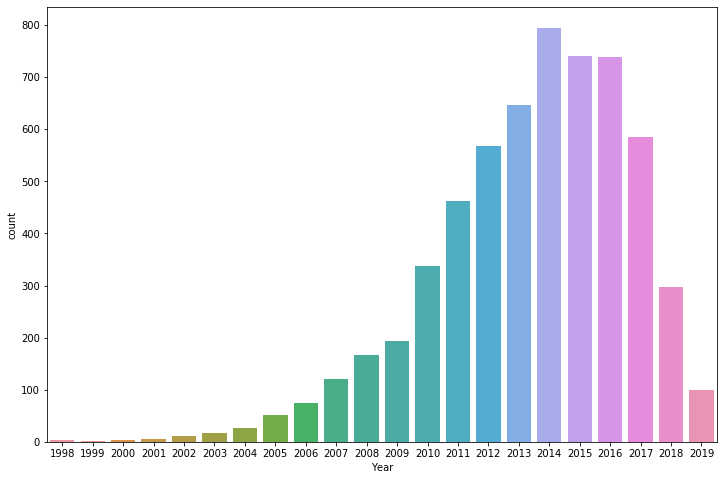

In [463]:
plt.figure(figsize=(12,8))
sns.countplot(data_train['Year'])
plt.show()

- Maximum cars are 2014 models while models older than year 2001 are very small in number
- There are also a large number of 2012-2017 year's models.

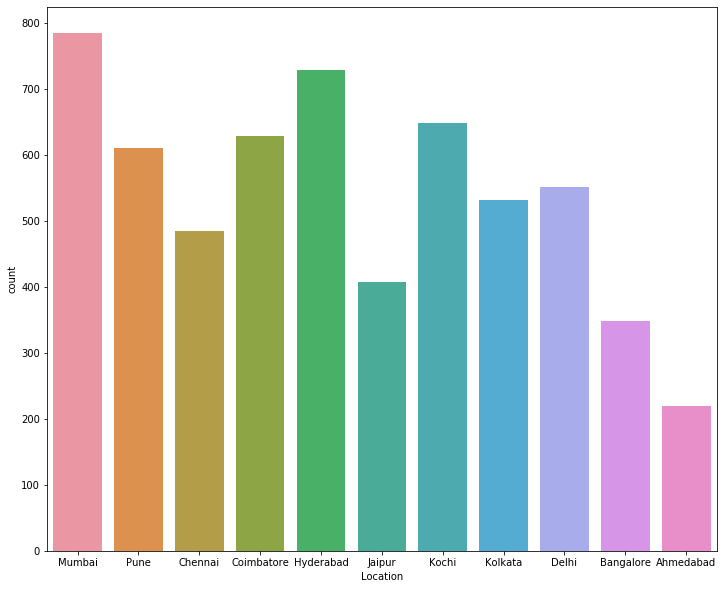

In [464]:
plt.figure(figsize=(12,10))
sns.countplot(data_train['Location'])
plt.show()

Maximum cars originated from Mumbai, while Ahmedabad lowest car purchases.

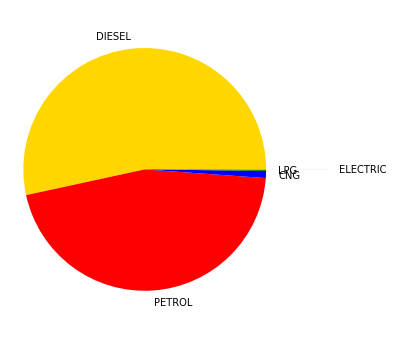

In [465]:
plt.figure(figsize=(6,6))
labels=['DIESEL','PETROL','CNG','LPG','ELECTRIC']
colors=['gold','red','blue','green','pink']
explode=(0,0,0,0,0.5)
plt.pie(data_train['Fuel_Type'].value_counts(),explode=explode,labels=labels,colors=colors)
plt.axis('equal')
plt.show()

Electric cars form a minuscle portion of the used car market. LPG and CNG vehicles are also small in number. Diesel and Petrol vehicles form the majority of the market.

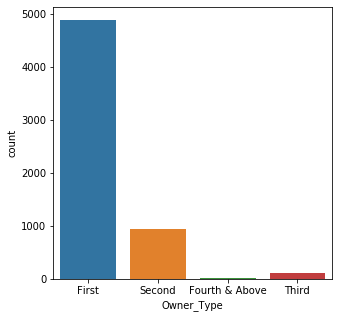

In [466]:
plt.figure(figsize=(5,5))
sns.countplot(data_train['Owner_Type'])
plt.show()

- First hand cars are most in number followed by second and third hand.
- Third, fourth and above constitute very small amount of cars.
- FOurth hand and above cars are minuscle in number leading us to believe that such cars have lost their resale value

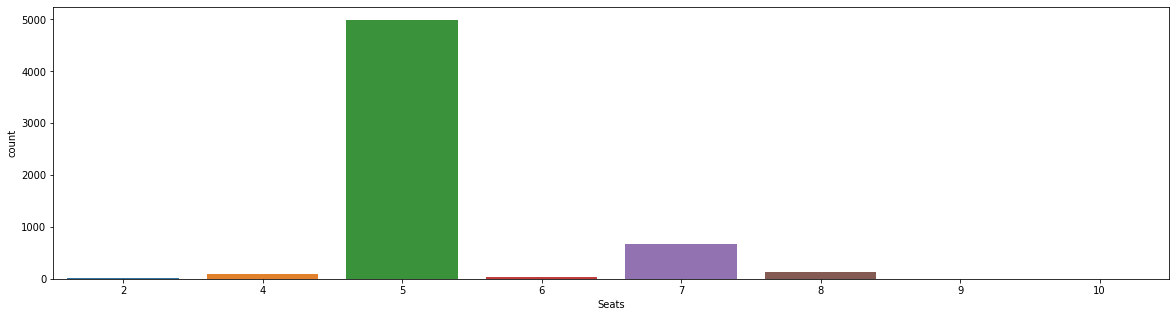

In [467]:
plt.figure(figsize=(20,5))
sns.countplot(data_train['Seats'])
plt.show()

5 seater cars constitute the majority of the dataset. Cars with various other seating capacities are minimal in number.

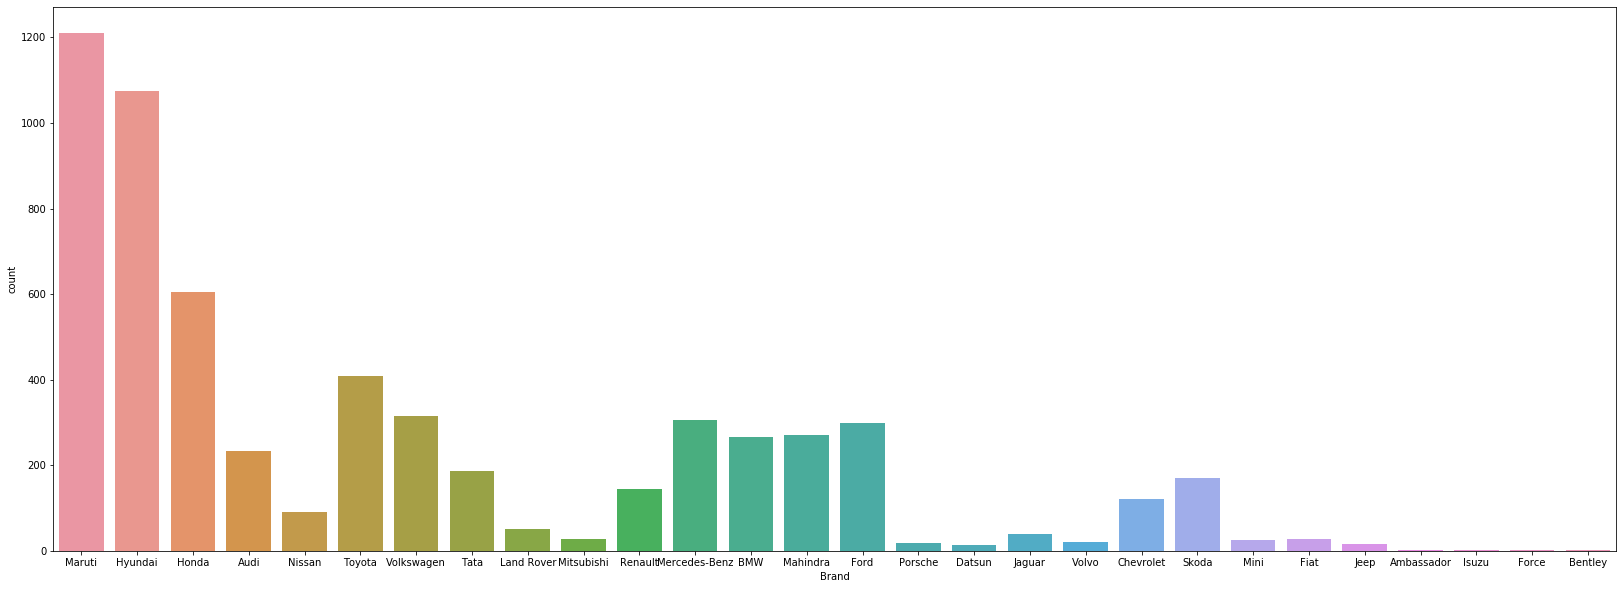

In [468]:
plt.figure(figsize=(28,10))
sns.countplot(data_train['Brand'])
plt.show()

Maruti and Hyundai contribute to most of the car sales

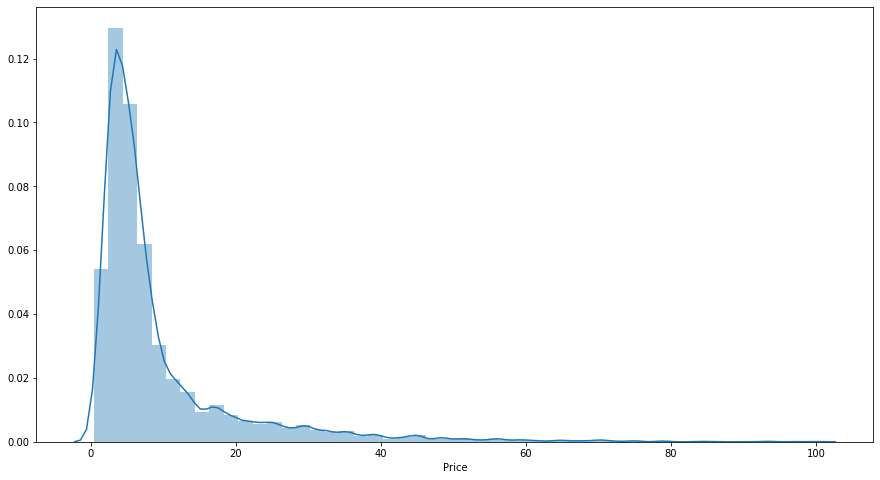

In [469]:
plt.figure(figsize=(15,8))
sns.distplot(data_train['Price'],kde=True)

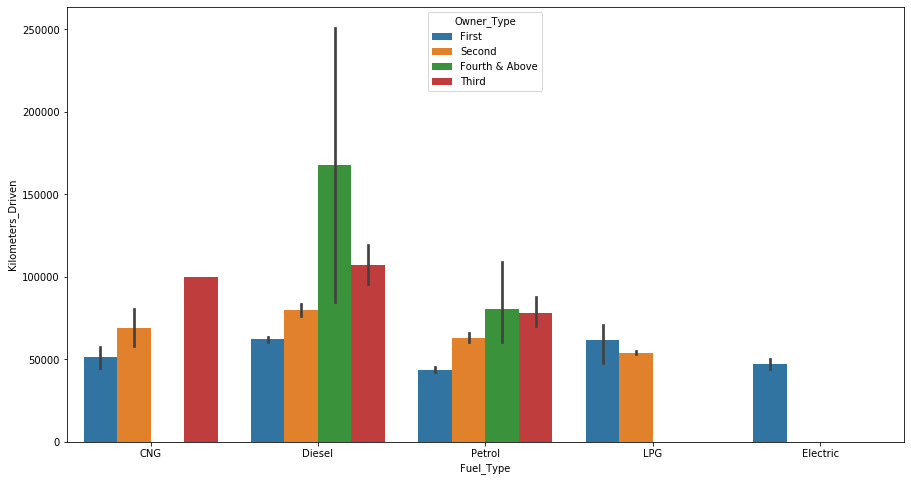

In [470]:
plt.figure(figsize=(15,8))
sns.barplot(data=data_train,x='Fuel_Type',y='Kilometers_Driven',hue='Owner_Type')

Since, kilometers_driven is a cumulative characteristic, fourth hand cars have highest kilometers driven.

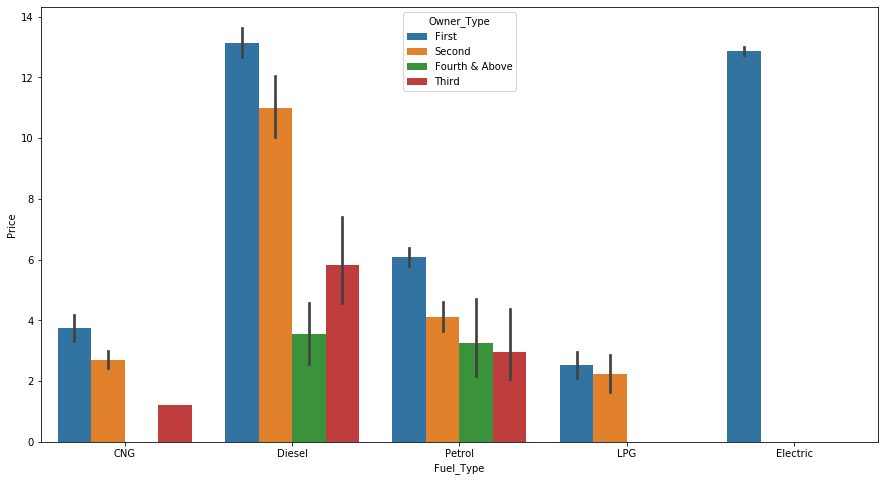

In [471]:
plt.figure(figsize=(15,8))
sns.barplot(data=data_train,x='Fuel_Type',y='Price',hue='Owner_Type')

- First hand diesel cars seem to be the most expensive on average
- CNG vehicles are generally low in price and have slowly decreasing value as owner type increases.

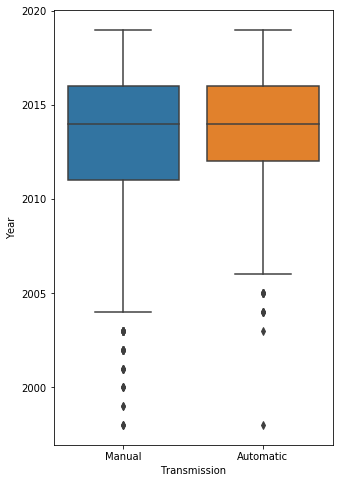

In [472]:
plt.figure(figsize=(5,8))
sns.boxplot(x='Transmission',y='Year',data=data_train)
plt.show()

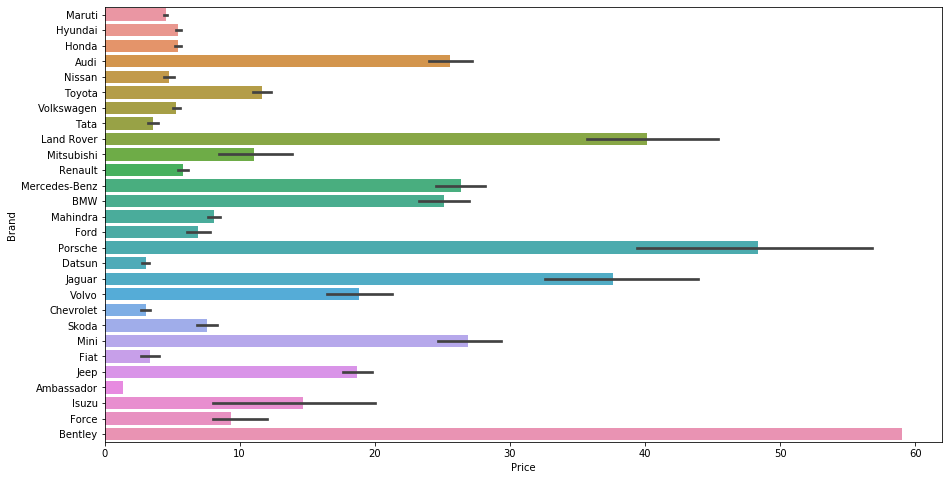

In [473]:
plt.figure(figsize=(15,8))
sns.barplot(data=data_train,x='Price',y='Brand')

- Bentley, Jaguar, Land Rover, and Porsche manufacture the most expensive cars on average resale.
- Ambassador produces the least pricey cars in the used car market.

<Figure size 1440x1440 with 0 Axes>

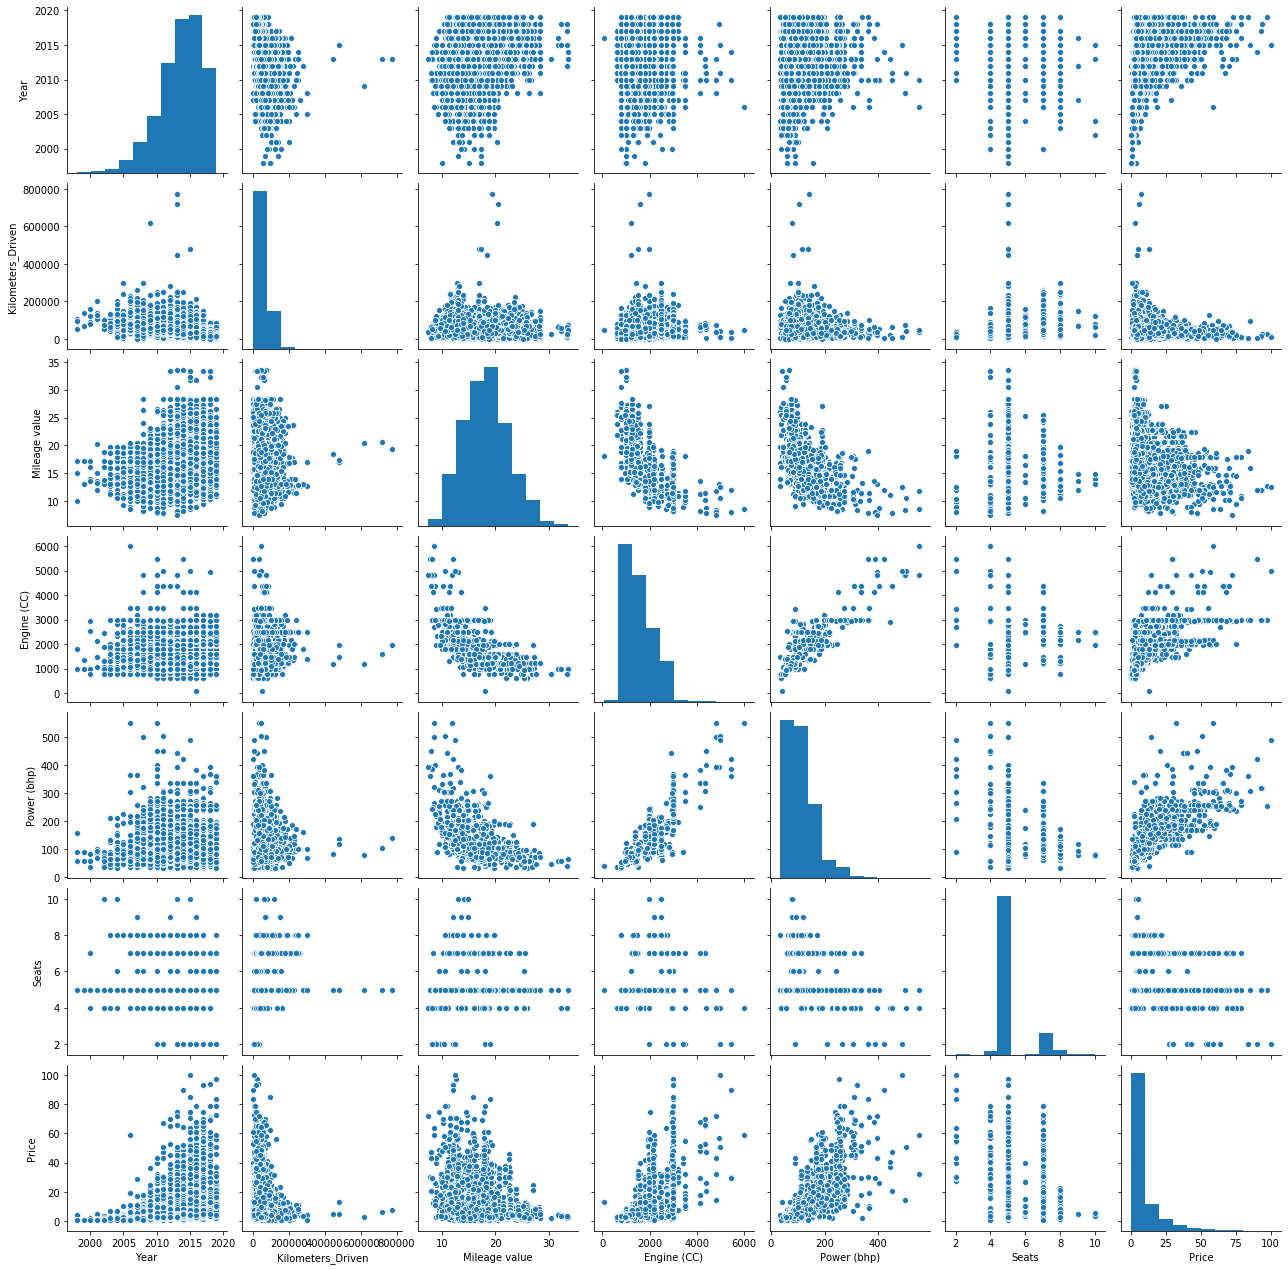

In [474]:
plt.figure(figsize=(20,20))
sns.pairplot(data=data_train)

# ML Model

In [486]:
data_train.isnull().sum()

Brand                0
Model                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage value        0
Mileage unit         0
Engine (CC)          0
Power (bhp)          0
Seats                0
Price                0
dtype: int64

In [487]:
# spliting the train dataset into features X and target Y variables
X = data_train.drop(['Price'], axis = 1)
Y = data_train.Price

In [488]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Brand'] = label_encoder.fit_transform(X['Brand'])
X['Model'] = label_encoder.fit_transform(X['Model'])
X['Location'] = label_encoder.fit_transform(X['Location'])
X['Fuel_Type'] = label_encoder.fit_transform(X['Fuel_Type'])
X['Transmission'] = label_encoder.fit_transform(X['Transmission'])
X['Mileage unit'] = label_encoder.fit_transform(X['Mileage unit'])
X['Owner_Type'] = label_encoder.fit_transform(X['Owner_Type'])

In [489]:
# visualizing features dataset in train dataset
X

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine (CC),Power (bhp),Seats
0,16,186,9,2010,72000,0,1,0,26.60,1,998,58.16,5
1,10,52,10,2015,41000,1,1,0,19.67,2,1582,126.20,5
2,9,98,2,2011,46000,4,1,0,18.20,2,1199,88.70,5
3,16,69,2,2012,87000,1,1,0,20.77,2,1248,88.76,7
4,1,10,3,2013,40670,1,0,2,15.20,2,1968,140.80,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,16,166,4,2014,27365,1,1,0,28.40,2,1248,74.00,5
6015,10,199,6,2015,100000,1,1,0,24.40,2,1120,71.00,5
6016,15,201,6,2012,55000,1,1,2,14.00,2,2498,112.00,8
6017,16,186,8,2013,46000,4,1,0,18.90,2,998,67.10,5


In [490]:
# visualizing target values in train dataset
Y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5947, dtype: float64

In [491]:
# importing necessary libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# spliting the train data into x_train, x_veri, y_train, y_veri with test set of size 5%
x_train, x_veri, y_train, y_veri = train_test_split(X,Y,test_size=0.05, random_state = 1)

In [492]:
# visualizing the x_train dataset
x_train

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine (CC),Power (bhp),Seats
5318,15,159,7,2016,72118,1,1,0,15.40,2,2179,120.00,8
1961,16,183,5,2016,41372,1,1,0,24.30,2,1248,88.50,5
2549,16,166,10,2014,68218,4,1,0,19.10,2,1197,85.80,5
5184,20,164,2,2016,18000,4,1,0,16.95,2,1498,97.70,5
3230,16,153,4,2014,90000,1,1,0,21.50,2,1248,88.80,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,24,96,4,2015,150000,1,1,0,25.00,2,1396,69.01,5
5253,17,116,5,2011,57000,1,0,2,14.94,2,2143,204.00,5
4030,8,63,5,2014,55000,1,1,0,22.70,2,1498,89.84,5
240,4,26,9,2013,74000,1,1,0,25.44,2,936,57.60,5


In [493]:
# visualizing the y_test values
y_veri.values

array([ 3.61,  9.66,  2.19,  2.6 , 42.83,  5.4 ,  4.85, 21.  ,  3.  ,
        4.5 ,  3.59, 12.34,  4.75,  5.1 ,  8.5 ,  6.  ,  4.82,  4.25,
        4.8 , 23.32, 70.36,  6.17,  8.11,  6.25,  2.95,  1.26, 17.5 ,
        2.4 ,  4.5 ,  3.5 ,  5.5 ,  3.5 ,  3.01,  8.5 ,  1.9 ,  7.23,
        5.75, 15.  ,  7.76,  1.2 ,  0.9 ,  8.2 ,  3.9 ,  1.95, 40.66,
        3.15,  2.8 ,  4.5 ,  5.89, 14.5 , 16.5 ,  5.75, 21.8 ,  7.5 ,
       12.95,  7.5 ,  9.75,  5.95,  4.9 , 28.88,  2.6 , 22.  ,  7.65,
       12.53,  8.  ,  2.61,  5.99,  5.5 ,  5.15,  6.99, 17.5 , 17.99,
        5.92,  1.5 , 13.5 ,  1.5 , 24.  , 18.12,  4.  ,  5.25, 22.  ,
        4.  ,  5.3 ,  9.  ,  2.74,  9.31,  3.1 ,  1.25,  2.7 ,  9.05,
        5.25,  7.99,  3.  ,  3.6 ,  3.95,  4.5 ,  3.95,  5.25,  4.85,
       42.5 ,  4.75,  7.5 ,  3.5 ,  1.25,  5.45, 32.5 ,  3.9 ,  8.9 ,
        2.15,  4.9 ,  2.4 ,  4.6 ,  4.41, 18.46,  5.5 ,  5.34,  6.51,
       39.75,  0.55,  4.  , 14.49,  3.75,  9.03,  4.8 ,  2.5 ,  4.  ,
       19.99, 24.5 ,

In [494]:
# initializing the RandomForestRegressor with 143 decision trees or n_estimators and Mean Squared Error as error metric
random_forest = RandomForestRegressor(n_estimators = 130, criterion = 'mse', random_state=0)

# training and fitting the random forest regressor
random_forest.fit(x_train, y_train)

# printing the score for the x_test set
random_forest.score(x_veri, y_veri)

0.9427608022599888

In [495]:
# updating the parameters of the random forest regressor
random_forest = RandomForestRegressor.set_params(random_forest, n_estimators = 200, criterion = 'mae', random_state=0, warm_start = True)

# again training and fitting the random forest regressor
random_forest.fit(x_train, y_train)

# printing the score for the x_test set
random_forest.score(x_veri, y_veri)

0.9405906538393932

In [496]:
# printing the mean squared error
y_pred = random_forest.predict(x_veri)
mean_squared_error(y_veri, y_pred)

7.358566907598959

In [497]:
# printing the mean absolute error
mean_absolute_error(y_veri, y_pred)

1.3648109823426013

In [498]:
# score metric mean squared log error
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [499]:
# score msle
import numpy as np
score(y_pred, y_veri)

0.9236973938399479

In [500]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_veri, y_pred)

0.9405906538393931

In [501]:
# RMS value
import math
rms = math.sqrt(mean_squared_error(y_veri, y_pred))
rms

2.712667857958095

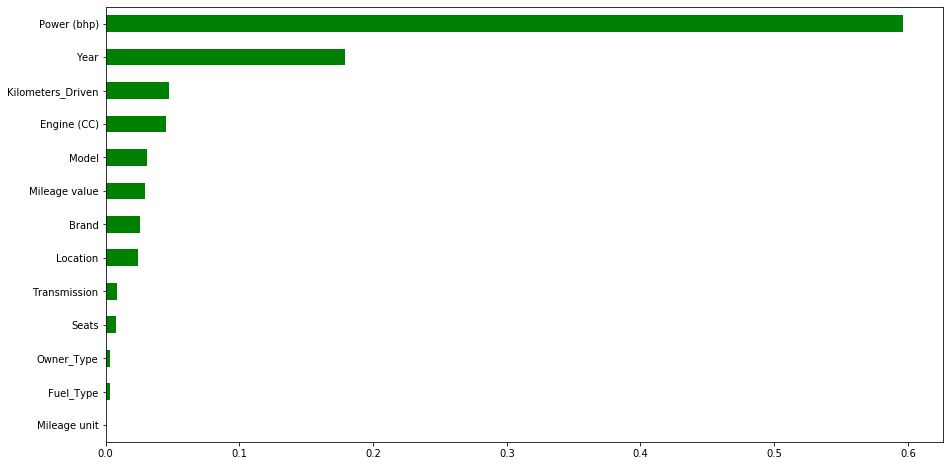

In [513]:
plt.figure(figsize=(15,8))
pd.Series(random_forest.feature_importances_,index=X.columns).sort_values().plot(kind='barh',color='green')
plt.show()

Power of the car seems to have the most relative importance in predicting the prices of the car in the used car market.

In [502]:
# visualizing the y_test and y_predict values
for x in zip(y_veri, y_pred, (y_pred - y_veri)/y_veri*100):
    print(x)

(3.61, 3.5134999999999987, -2.673130193905849)
(9.66, 10.202275000000002, 5.613612836438942)
(2.19, 2.588799999999998, 18.210045662100377)
(2.6, 2.1925750000000055, -15.6701923076921)
(42.83, 43.112299999999934, 0.6591174410458449)
(5.4, 4.497250000000005, -16.71759259259251)
(4.85, 5.472625000000001, 12.837628865979406)
(21.0, 21.746400000000005, 3.5542857142857374)
(3.0, 2.6114000000000015, -12.953333333333283)
(4.5, 4.647950000000005, 3.287777777777892)
(3.59, 3.288000000000003, -8.412256267409386)
(12.34, 11.9327, -3.3006482982171743)
(4.75, 5.694550000000006, 19.885263157894858)
(5.1, 4.670200000000002, -8.42745098039211)
(8.5, 7.856350000000016, -7.572352941176283)
(6.0, 6.173600000000014, 2.8933333333335627)
(4.82, 5.498399999999995, 14.074688796680384)
(4.25, 4.377449999999999, 2.9988235294117347)
(4.8, 4.793550000000003, -0.13437499999992739)
(23.32, 24.874866666666662, 6.6675242995997515)
(70.36, 58.19190000000007, -17.29405912450246)
(6.17, 5.932199999999989, -3.854132901134

In [503]:
# composing the test dataset with predicted values
testX = data_test.copy(deep=True)
#label_encoder = LabelEncoder()
testX['Brand'] = label_encoder.fit_transform(testX['Brand'])
testX['Model'] = label_encoder.fit_transform(testX['Model'])
testX['Location'] = label_encoder.fit_transform(testX['Location'])
testX['Fuel_Type'] = label_encoder.fit_transform(testX['Fuel_Type'])
testX['Transmission'] = label_encoder.fit_transform(testX['Transmission'])
testX['Mileage unit'] = label_encoder.fit_transform(testX['Mileage unit'])
testX['Owner_Type'] = label_encoder.fit_transform(testX['Owner_Type'])

In [504]:
testX

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine (CC),Power (bhp),Seats
0,15,16,4,2014,40929,0,1,0,32.26,0,998,58.20,4
1,15,16,3,2013,54493,3,1,2,24.70,1,796,47.30,5
2,25,80,9,2017,34000,1,1,0,13.68,1,2393,147.80,7
3,25,61,5,2012,139000,1,1,0,23.59,1,1364,90.00,5
4,9,161,9,2014,29000,3,1,0,18.50,1,1197,82.85,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,26,139,5,2011,89411,1,1,0,20.54,1,1598,103.60,5
1230,26,103,9,2015,59000,3,0,0,17.21,1,1197,103.60,5
1231,19,93,8,2012,28000,1,1,0,23.08,1,1461,63.10,5
1232,26,103,10,2013,52262,3,0,3,17.20,1,1197,103.60,5


In [505]:
# predicting the test data set values
testY = random_forest.predict(testX)

In [506]:
testY

array([ 5.22525 ,  2.8403  , 19.8559  , ...,  3.36465 ,  4.1302  ,
       17.651875])

In [507]:
# appending the predicted values to the test dataset
data_test['Predicted Price'] = testY
data_test.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine (CC),Power (bhp),Seats,Predicted Price
0,Maruti,Alto,Delhi,2014,40929,CNG,Manual,First,32.26,km/kg,998,58.20,4,5.225250
1,Maruti,Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,kmpl,796,47.30,5,2.840300
2,Toyota,Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68,kmpl,2393,147.80,7,19.855900
3,Toyota,Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59,kmpl,1364,90.00,5,4.622000
4,Hyundai,i20,Mumbai,2014,29000,Petrol,Manual,First,18.50,kmpl,1197,82.85,5,4.370142


In [508]:
# converting the dataset to excel file
data_test.to_excel('./TEST_SET_PREDICTED_PRICES.xlsx')

In [509]:
data_test.head(50)

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage value,Mileage unit,Engine (CC),Power (bhp),Seats,Predicted Price
0,Maruti,Alto,Delhi,2014,40929,CNG,Manual,First,32.26,km/kg,998,58.20,4,5.225250
1,Maruti,Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,kmpl,796,47.30,5,2.840300
2,Toyota,Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68,kmpl,2393,147.80,7,19.855900
3,Toyota,Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59,kmpl,1364,90.00,5,4.622000
4,Hyundai,i20,Mumbai,2014,29000,Petrol,Manual,First,18.50,kmpl,1197,82.85,5,4.370142
5,Mahindra,XUV500,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,kmpl,2179,140.00,7,12.831750
6,Toyota,Fortuner,Pune,2015,59000,Diesel,Automatic,First,12.55,kmpl,2982,168.70,7,19.186200
7,Hyundai,EON,Jaipur,2013,65000,Petrol,Manual,First,21.10,kmpl,814,55.20,5,2.482200
8,Honda,City,Mumbai,2011,66000,Petrol,Manual,Second,17.00,kmpl,1497,118.00,5,4.108850
9,Mahindra,XUV500,Coimbatore,2015,54684,Diesel,Manual,First,15.10,kmpl,2179,140.00,7,10.768250
